In [32]:
import PIL
from PIL import Image, ImageOps
import numpy as np
import torch
from torch import autocast
from slugify import slugify
from time import time

from diffusers import DDIMScheduler
from diffusion_utils import StableDiffusionImg2ImgPipeline, stable_diffusion_preprocess_image

In [33]:
device     = 'cuda'
model_path = 'models/stable-diffusion-v1.4'

scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False, set_alpha_to_one=False)
model = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    scheduler=scheduler,
    revision='fp16',
    torch_dtype=torch.float16,
).to(device)

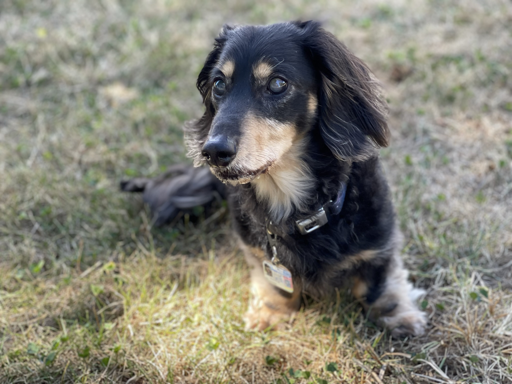

torch.Size([1, 3, 384, 512])

In [38]:
# load image from disk

# tweak this according to your GPU VRAM
desired_size = (512, 512)

start_image = Image.open('gus.jpeg').convert('RGB')
start_image.thumbnail(desired_size)
start_image.show()

#resize to keep aspect ratio

#disable nsfw
model.safety_checker = lambda images, **kwargs: (images, False)

# preprocess for Stable Diffusion
start_image_preprocessed = stable_diffusion_preprocess_image(start_image)
start_image_preprocessed.shape

In [39]:
generator = torch.Generator(device=device).manual_seed(42)

0it [00:00, ?it/s]

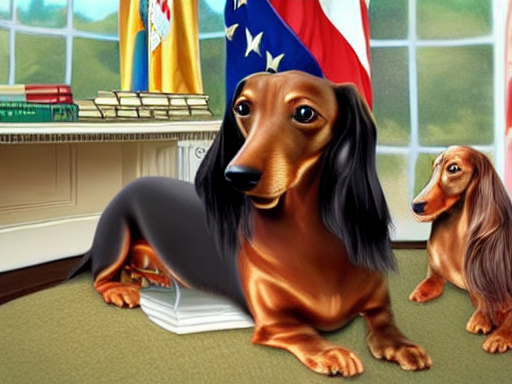

0it [00:00, ?it/s]

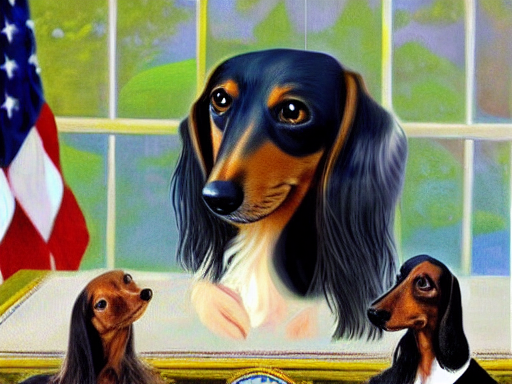

0it [00:00, ?it/s]

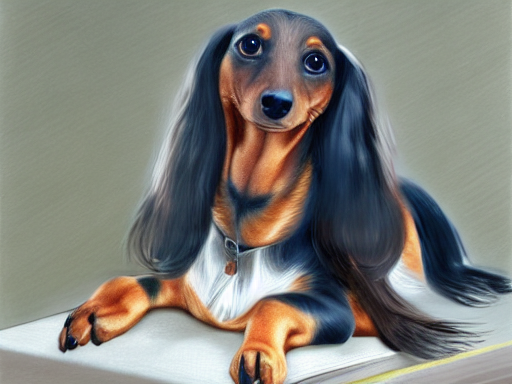

0it [00:00, ?it/s]

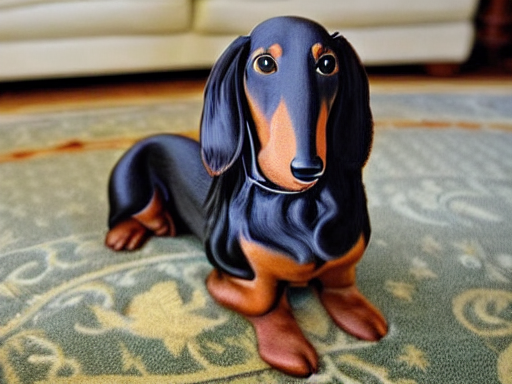

0it [00:00, ?it/s]

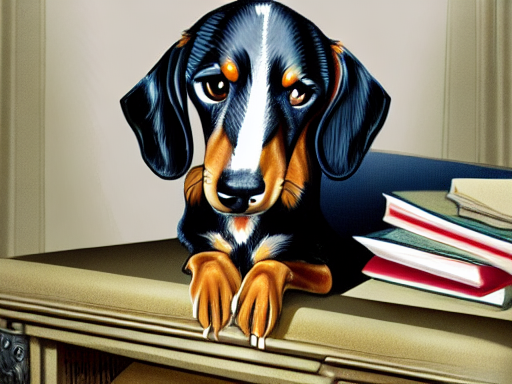

0it [00:00, ?it/s]

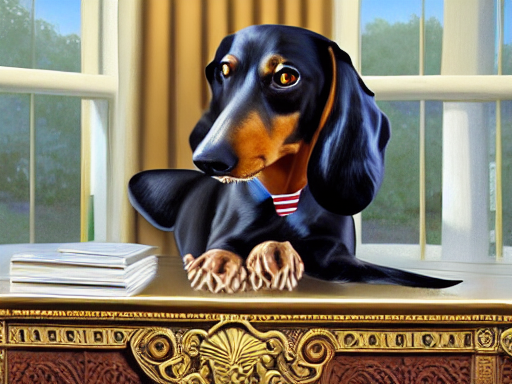

0it [00:00, ?it/s]

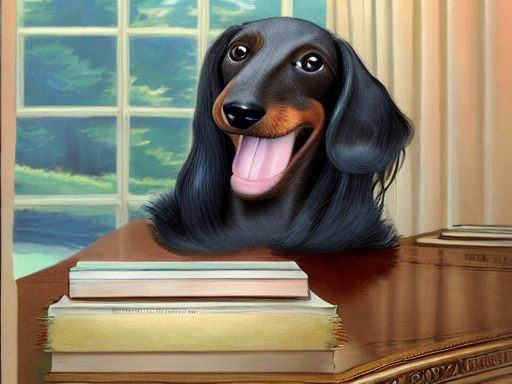

0it [00:00, ?it/s]

In [ ]:
prompt = 'a long haired dachshund as president in the oval office, photorealistic, close up'
repetitions = 15

with autocast('cuda'):
    for r in range(repetitions):
        image = model(
            prompt = prompt,
            init_image = start_image_preprocessed,
            num_inference_steps=50,
            strength = 0.8, # 0 = no noise, 1 = max noise
            guidance_scale = 7.5,# how much to rely on the textual prompt
            generator = generator,
        )
        image = image['sample'][0]
        image.show()
        image.save(f'images/{time()}_{slugify(prompt[:100])}.png')